# Dataset investigation
This notebook allows to:
- view dataset data
- remove broken data samples
- tag images

The approach can be similar as in other jupyter notebooks - using notebook for visualisation and decision.
However here we will try to utilize napari - opensource image viewer https://napari.org/ (https://github.com/napari/napari) 

In [ ]:
import numpy as np

In [1]:
import importlib
from functools import partial
from utils import *

root_dir = add_root_to_path(3)

import skimage.morphology
import sep._commons.visuals as visuals

## Prepare dataset

ImageLoader for: D:\Fafa\Drozdze\SEP\SEP\tests\input\basics\humans
ImageLoader for: D:\Fafa\Drozdze\SEP\SEP\tests\input\basics\humans
Found 3 images.
Found 3 annotations.
Found 3 tags.


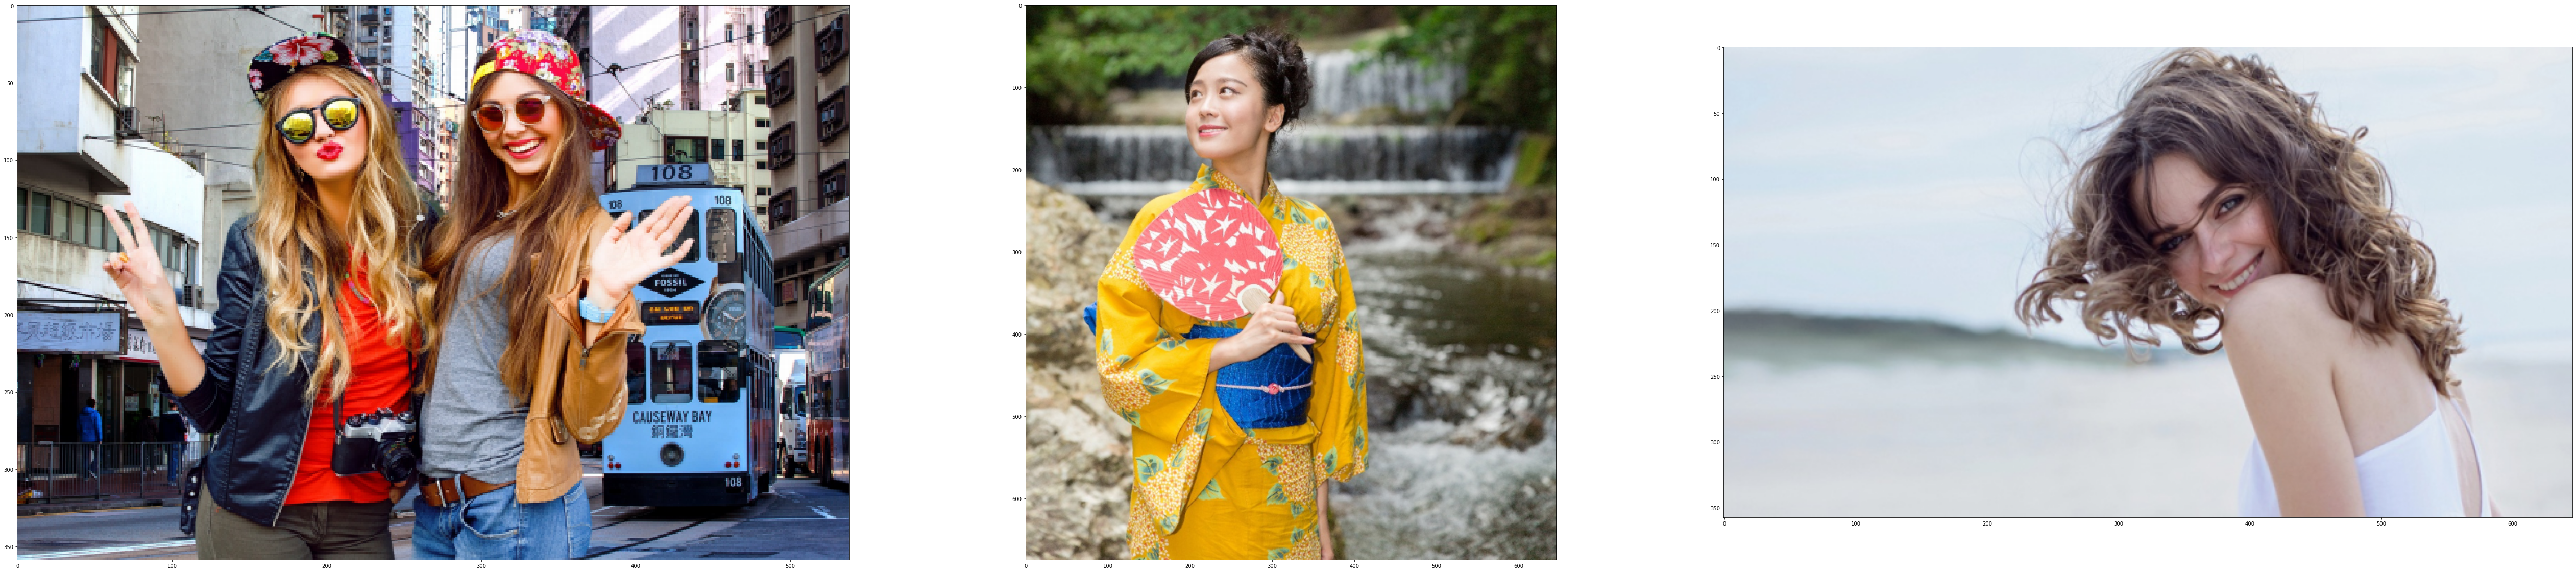

In [2]:
import sep.loaders.images
data_root = pick_path([root_dir / "tests" / "input" / "basics"])
dataset = data_root / "humans"
data_loader = sep.loaders.images.ImagesLoader.from_tree(str(dataset))
print(data_loader)
data_loader.show_summary()
show(data_loader[0]['image'], data_loader[1]['image'], data_loader[2]['image']);

## Show in napari with review tag

In [3]:
import napari
from magicgui import magicgui
from sep._commons.gui import Inspector
from enum import Enum

class ReviewEnum(Enum):
    No = 0
    Approved = 1
    Rejected = 2
        
inspector = Inspector(data_loader, additional_tags={'review': ReviewEnum.No}) 

# Extend inspector with the additional tag representing the review status. 
with napari.gui_qt():  
    def load_tags(current_tag):
        tags_properties.Review.value = inspector.viewer_state['current_tag'].get('review', ReviewEnum.No)
    
    @magicgui(auto_call=True)
    def tags_properties(Review:ReviewEnum):
        inspector.viewer_state['current_tag']['review'] = Review
        
    inspector.set_load_tag_to_control(load_tags)
    inspector.create_viewer()
    
    @inspector.viewer.bind_key('1')
    def approve_move_key(event=None):
        tags_properties.Review.value = ReviewEnum.Approved
        inspector.viewer.keymap['C']()  # move to the next
        
    @inspector.viewer.bind_key('2')
    def reject_move_key(event=None):
        tags_properties.Review.value = ReviewEnum.Rejected
        inspector.viewer.keymap['C']()  # move to the next
        
    inspector.viewer.window.add_dock_widget(tags_properties)
    
# Then we can use inspector.viewer_state to get samples marked for some processing.
# See sep.examine for some implementation of the some pipeline.

In [7]:
# Same as above review already wrapped in sep._commons.gui
from sep._commons.gui import Inspector, add_review_option

with napari.gui_qt():
    inspector_sep = Inspector(data_loader)
    inspector_sep.create_viewer()
    add_review_option(inspector_sep)

## Preview entire dataset (overlays) - TODO as now very heavy

In [5]:
def show_tiles(loader, skips=1):
    import sep._commons.visuals as visuals
    overlays = [visuals.overlay(d['image'], d['annotation']) for d in list(loader)[::skips] if d['annotation'] is not None]
    no_overlays = [d['image'] for d in list(loader)[::skips]  if d['annotation'] is None]
    with napari.gui_qt():
        viewer = napari.Viewer()
        for presented_data in overlays + no_overlays:
            viewer.add_image(presented_data, rgb=True) 
        #viewer.window._qt_window.showFullScreen()
        viewer.grid.enabled = True

show_tiles(data_loader)

In [6]:
from sep.loaders import MoviesLoader
data_root = pick_path([root_dir / "tests" / "input"])
dataset = data_root / "reptiles"
movie_loader = MoviesLoader.from_tree(str(dataset), framerate=1)
movie_loader.show_summary()

show_tiles(movie_loader)

MovieLoader for: D:\Fafa\Drozdze\SEP\SEP\tests\input\reptiles
Found 18 input frames.
Found 0 annotation frames.
Found 18 tags.
